# Time Series Forecasting
    Predicting the stock price of SBI using Time Series Forecasting

In [2]:
#import the necessary function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#import the data
df = pd.read_csv('C:\\Users\\Lenovo\\SBI_Historical_Data.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


In [8]:
df.columns.values

array(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'],
      dtype=object)

In [9]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))
df.sort_values(['Date'], inplace=True)
df.reset_index(drop=True, inplace=True)
df_temp = df.copy(deep=True)

In [10]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2015-01-01,314.00,312.45,315.00,310.70,6.14M,0.69%
1,2015-01-02,315.25,314.35,318.30,314.35,9.94M,0.40%
2,2015-01-05,312.75,316.25,316.80,312.10,9.14M,-0.79%
3,2015-01-06,299.90,310.00,311.10,298.70,15.33M,-4.11%
4,2015-01-07,300.15,300.00,302.55,295.15,15.05M,0.08%


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1385 non-null   datetime64[ns]
 1   Price     1385 non-null   float64       
 2   Open      1385 non-null   float64       
 3   High      1385 non-null   float64       
 4   Low       1385 non-null   float64       
 5   Vol.      1385 non-null   object        
 6   Change %  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.9+ KB


In [12]:
df.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


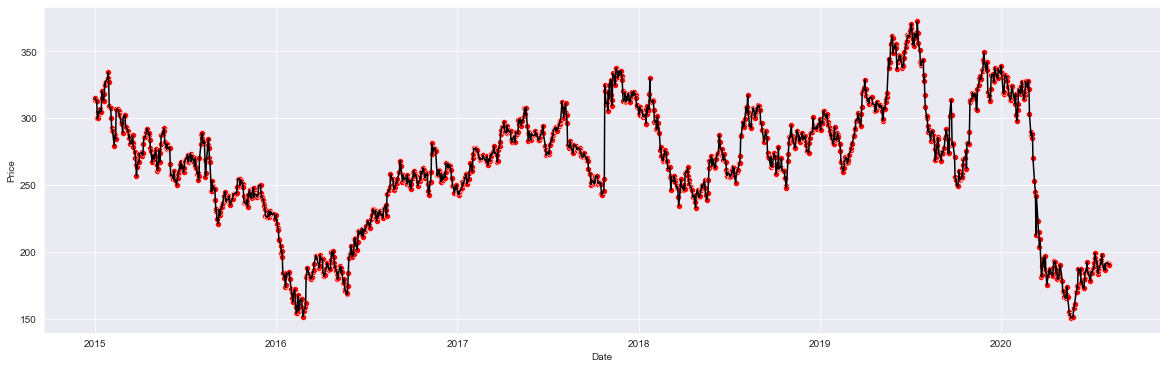

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.lineplot(df_temp.Date, df_temp.Price, color='black')
sns.scatterplot(df_temp.Date, df_temp.Price, color='red')
plt.xlabel('Date')
plt.show()

    Looking at the graph the price of sbi stock looks irregular

In [14]:
df['S1'] = df['Price'] - df['Price'].shift(1)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,S1
0,2015-01-01,314.00,312.45,315.00,310.70,6.14M,0.69%,NaN
1,2015-01-02,315.25,314.35,318.30,314.35,9.94M,0.40%,1.25
2,2015-01-05,312.75,316.25,316.80,312.10,9.14M,-0.79%,-2.50
3,2015-01-06,299.90,310.00,311.10,298.70,15.33M,-4.11%,-12.85
4,2015-01-07,300.15,300.00,302.55,295.15,15.05M,0.08%,0.25


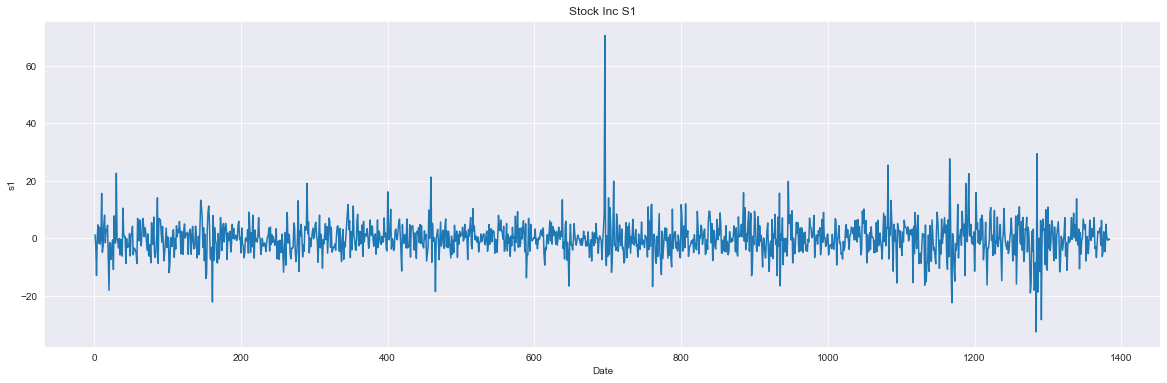

In [15]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("s1")
plt.plot(df['S1'])
plt.title("Stock Inc S1")
plt.show()

    After shifting the price in sbi stock looks stationary

In [16]:
df = df.dropna()
df.head()

,Date,Price,Open,High,Low,Vol.,Change %,S1
1,2015-01-02,315.25,314.35,318.30,314.35,9.94M,0.40%,1.25
2,2015-01-05,312.75,316.25,316.80,312.10,9.14M,-0.79%,-2.50
3,2015-01-06,299.90,310.00,311.10,298.70,15.33M,-4.11%,-12.85
4,2015-01-07,300.15,300.00,302.55,295.15,15.05M,0.08%,0.25
5,2015-01-08,304.85,305.00,306.50,302.35,8.94M,1.57%,4.70


## ADfuller Test 
For checking stationary data 

In [17]:
# ADfuller Test -For checking stationary data 
from statsmodels.tsa.stattools import adfuller

In [18]:
ADF_test=adfuller(df["S1"],autolag="AIC")
print(ADF_test)

(-13.798233855531931, 8.66862387032049e-26, 6, 1377, {'1%': -3.4351078301822016, '5%': -2.8636412316027577, '10%': -2.5678886927682663}, 8706.274782330333)


#### Null Hypothesis H0: No Stationary
#### Alternative Hypothesis : Stationary

In [19]:
output=pd.DataFrame(ADF_test[0:4],index=["Test Statistics","p-Value","Lag","number of observation"])

In [20]:
print(output)

                                  0
Test Statistics       -1.379823e+01
p-Value                8.668624e-26
Lag                    6.000000e+00
number of observation  1.377000e+03


    Since the p-value is less than 0.05, we reject the null hypothesis so the variable is stationary.

## KPSS test
For checking stationry data

In [21]:
df_kpss = df.copy(deep=True)
df_kpss['S2'] = df_kpss['Price'] - df_kpss['Price'].shift(2)
df_kpss.dropna(inplace=True)

In [22]:
df_kpss.head()

,Date,Price,Open,High,Low,Vol.,Change %,S1,S2
3,2015-01-06,299.90,310.00,311.10,298.70,15.33M,-4.11%,-12.85,-15.35
4,2015-01-07,300.15,300.00,302.55,295.15,15.05M,0.08%,0.25,-12.60
5,2015-01-08,304.85,305.00,306.50,302.35,8.94M,1.57%,4.70,4.95
6,2015-01-09,303.20,306.70,307.85,302.00,11.95M,-0.54%,-1.65,3.05
7,2015-01-12,307.10,304.15,307.80,301.10,8.54M,1.29%,3.90,2.25


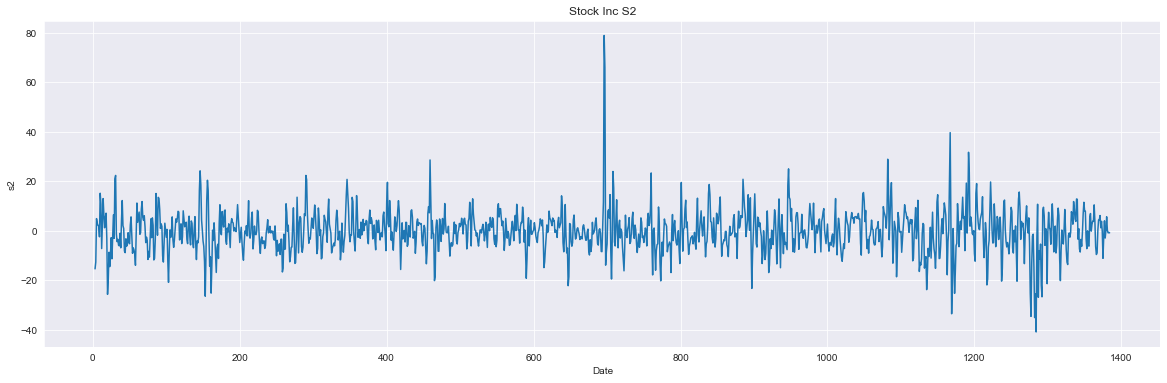

In [23]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("s2")
plt.plot(df_kpss['S2'])
plt.title("Stock Inc S2")
plt.show()

### Null Hypothesis H0: Stationary
### Alternate Hypothesis H1: Not Stationary

In [24]:
from statsmodels.tsa.stattools import kpss   

In [25]:
statistic, p_value, n_lags, critical_values  = kpss(df_kpss
                                                    ['S2'], nlags='auto')

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [26]:
print(f'KPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')

KPSS Statistic: 0.08890690301715792
p-value: 0.1
num lags: 7


    Since p-value is greater than 0.05 the data is stationary

## Performing Decomposing

In [27]:
# EDA -Graph view
from statsmodels.tsa.seasonal import seasonal_decompose
# decompose used for checking trend seasonality and error
plt.style.use("dark_background")

<Figure size 432x288 with 0 Axes>

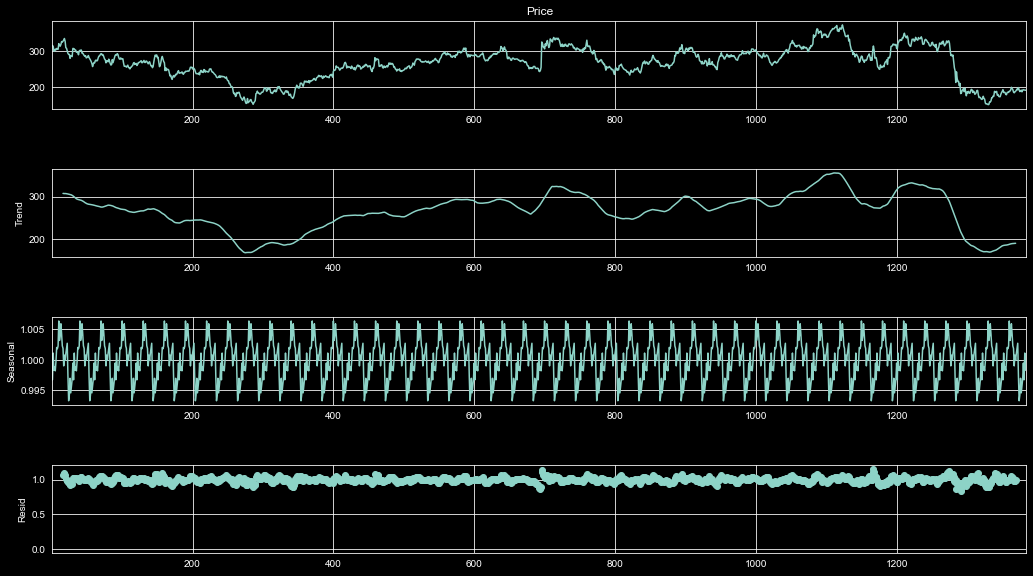

In [28]:
result = seasonal_decompose(df['Price'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)
plt.show()

In [29]:
df.shape
0.8 * 1384

1107.2

In [30]:
train = df['Price'].iloc[:1106]
train.shape

(1106,)

In [31]:
test = df['Price'].iloc[1106:]
test.shape

(278,)

## Auto Arima
    Finding the parameters using AutoArima

In [34]:
from pmdarima.arima import auto_arima

In [35]:
model = auto_arima(train, start_p=1, start_q=1, test='adf', max_p=3, max_q=3, 
                  m=1, d=None, sesonal=False, start_P=0, D=0, trace=True, 
                  error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6918.259, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6914.396, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6916.260, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6916.260, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6912.439, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.222 seconds


In [36]:
#p=0, d=1, q=0 --parameters

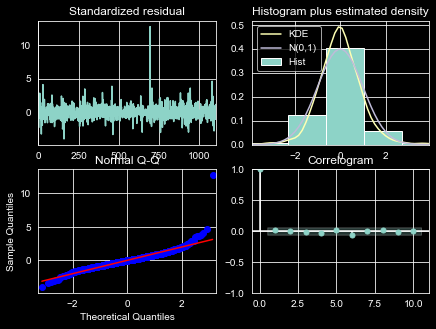

In [37]:
#Checking residual and normality of residual 
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [39]:
# For identifying p value we have use plot pacf

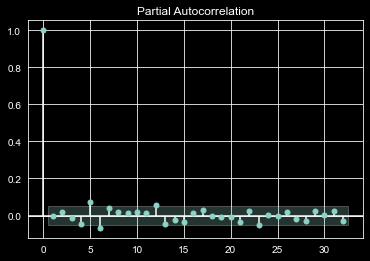

In [40]:
plot_pacf(df["S1"]);# p=0-Autoregressive

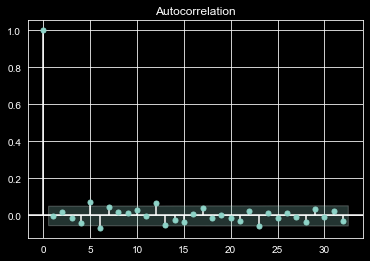

In [41]:
plot_acf(df['S1']); # q=0 # An MA term is technically the error of the lagged forecast

## ARIMA Model

In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
model_arima = ARIMA(train, order=(0, 1, 0))
model_arima_fit = model_arima.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [44]:
y_pred = model_arima_fit.forecast(steps=278)[2]
y_pred

array([[342.42010707, 364.04858071],
       [337.9750474 , 368.56232817],
       [334.57222405, 372.0338393 ],
       [331.70890192, 374.96584921],
       [329.19035079, 377.55308812],
       [326.91670117, 379.89542552],
       [324.82862599, 382.05218849],
       [322.88747037, 384.0620319 ],
       [321.06638455, 385.95180549],
       [319.3458194 , 387.74105843],
       [317.71101687, 389.44454874],
       [316.15051145, 391.07374194],
       [314.65518522, 392.63775596],
       [313.21764539, 394.14398357],
       [311.83179925, 395.59851749],
       [310.49255497, 397.00644956],
       [309.19560547, 398.37208684],
       [307.9372689 , 399.69911119],
       [306.71436847, 400.9906994 ],
       [305.5241405 , 402.24961515],
       [304.36416289, 403.47828055],
       [303.23229878, 404.67883244],
       [302.12665164, 405.85316736],
       [301.04552904, 407.00297774],
       [299.98741317, 408.1297814 ],
       [298.95093659, 409.23494576],
       [297.9348622 , 410.31970794],
 

In [45]:
#forecast the model
y_pred = pd.DataFrame(y_pred)[0]
y_pred

0      342.420107
1      337.975047
2      334.572224
3      331.708902
4      329.190351
          ...    
273    183.602755
274    183.310740
275    183.019319
276    182.728487
277    182.438241
Name: 0, Length: 278, dtype: float64

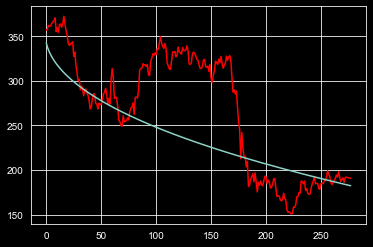

In [46]:
#visualize the forecast
plt.plot(np.array(test), color='red')
plt.plot(y_pred)
plt.show()

## MSE and RMSE

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mse = mean_squared_error(test, y_pred)
print('Mean Squared Error', mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error 2885.5175717103416
Root Mean Squared Error: 53.717013801125816
